In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load xdf data
data, header = pyxdf.load_xdf('C:/Users/seinj/Teaching/Recordings_2023_EMG-ECG/source-data/pb_04_elevated.xdf')

In [3]:
# Explore xdf header 
print("XDF Header:")
print(header)

XDF Header:
{'info': defaultdict(<class 'list'>, {'version': ['1.0']})}


In [4]:
# Examine which streams are in the xdf data
print("\nStream Names:")
for stream in data:
    stream_name = stream['info']['name'][0]
    print(stream_name)


Stream Names:
OpenSignals
PlankP3Events


In [5]:
# Examine the channels in OpenSignals stream
#display(data[0]['info']['desc'])
channel_headers = data[0]['info']['desc'][0]['channels'][0]['channel']
for channel_header in channel_headers:
    channel_label = channel_header['label'][0]
    channel_unit = channel_header['unit'][0]
    print(channel_label)
    print(channel_unit)

nSeq
None
EMGBITREV0
mV
ECGBIT1
mV


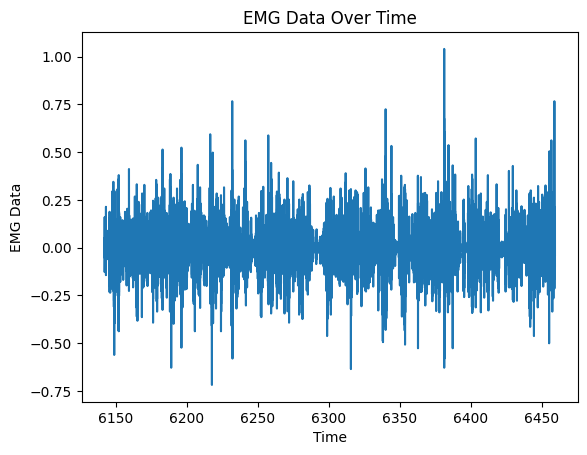

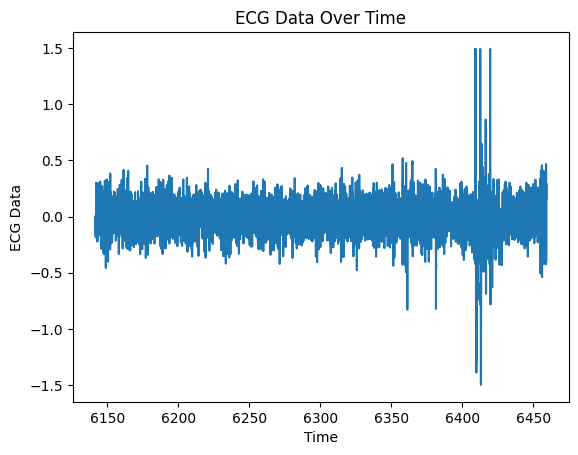

EMG and ECG data saved to: C:/Users/seinj/Teaching/Recordings_2023_EMG-ECG/csv-data


In [6]:
# Check for numeric data before accessing
if 'time_series' in data[0] and 'time_stamps' in data[0]:
    emg   = data[0]['time_series'][:,1]
    ecg   = data[0]['time_series'][:,2]
    times = data[0]['time_stamps']

    # plot EMG data as line
    plt.plot(times, emg)
    #plt.plot(times[0:10000], emg[0:10000])
    plt.xlabel('Time')
    plt.ylabel('EMG Data')
    plt.title('EMG Data Over Time')
    #plt.ylim([-1, 1])
    plt.show()

    # plot ECG data as line
    plt.plot(times, ecg)
    #plt.plot(times[0:10000], ecg[0:10000])
    plt.xlabel('Time')
    plt.ylabel('ECG Data')
    plt.title('ECG Data Over Time')
    plt.show()


    # Save numeric data to a CSV file
    output_file_folder = 'C:/Users/seinj/Teaching/Recordings_2023_EMG-ECG/csv-data'
    emg_output_file_name = 'pb_04_elevated_emg.csv'
    ecg_output_file_name = 'pb_04_elevated_ecg.csv'
    emg_output_file_path = output_file_folder + '/' + emg_output_file_name
    ecg_output_file_path = output_file_folder + '/' + ecg_output_file_name
    
    os.makedirs(output_file_folder, exist_ok=True)    
    np.savetxt(emg_output_file_path, emg, delimiter=',', header='EMG Data', comments='')
    np.savetxt(ecg_output_file_path, ecg, delimiter=',', header='ECG Data', comments='')
    
    print(f"EMG and ECG data saved to: {output_file_folder}")

else:
    print("The selected stream does not contain numeric data.")